In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score,KFold
import numpy as np
import random 
import matplotlib.pyplot as plt

In [65]:
(x,y) =  make_regression(n_samples=10,n_features=2)

(-1.463128792676844,
 1.2154596532621098,
 -1.828434209693336,
 1.9436822505471791)

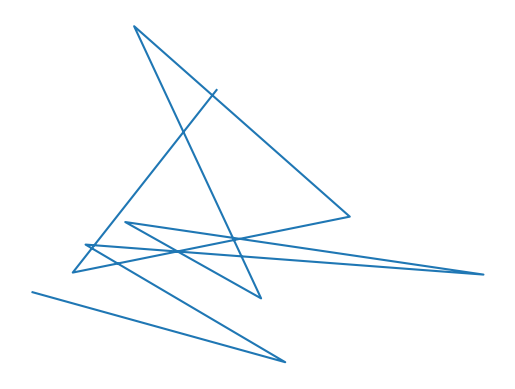

In [66]:
%matplotlib inline
plt.plot(x[:,0],x[:,1])
plt.axis("off")

**Things about KFOLD**
- it splits the data into train and test internally
- the output is the indexes
- The output have the equal length of train and test each time 

In [67]:
kf =  KFold(n_splits=10,shuffle=True,random_state=True)

In [68]:
for i,(train_index,test_index) in enumerate(kf.split(x,y)):
    print(f"KFOLD: {i} TRAIN_SET : {len(train_index)} TEST_SET : {len(test_index)} ")
    
    #print(x[train_index]) ## THESE ARE INDEXES 
    
    

KFOLD: 0 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 1 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 2 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 3 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 4 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 5 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 6 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 7 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 8 TRAIN_SET : 9 TEST_SET : 1 
KFOLD: 9 TRAIN_SET : 9 TEST_SET : 1 


**Things about cross_val_Score**
- it gives scores in squared form which by rooting we get 'RMSE' scores
- we can get scores.mean() and scores.std() for checking metrics of the model

In [69]:
model_rf=   RandomForestRegressor()
model_lr  =  LinearRegression()
model_dt =  DecisionTreeRegressor()

In [70]:
scores_rf = np.sqrt(-cross_val_score(model_rf,x,y,scoring="neg_mean_squared_error",cv=kf))
scores_lr = np.sqrt(-cross_val_score(model_lr,x,y,scoring="neg_mean_squared_error",cv=kf))
scores_dt = np.sqrt(-cross_val_score(model_dt,x,y,scoring="neg_mean_squared_error",cv=kf))

In [71]:
print("FINAL Score of Decision tree : ",scores_dt.mean())
print("FINAL Score of Linear Regression : ",scores_lr.mean())
print("FINAL Score of RandomForestRegressor : ",scores_rf.mean())

FINAL Score of Decision tree :  35.60871973819101
FINAL Score of Linear Regression :  2.062794379753541e-14
FINAL Score of RandomForestRegressor :  39.25829837143298


In [72]:
model_dt.fit(x,y)
model_lr.fit(x,y)
model_rf.fit(x,y)

RandomForestRegressor()

In [73]:
index=  random.randint(1,9)
sample  =  x[index]
label =  y[index]
index

5

In [74]:
print("True Label : ",label)
print("DECION TREE PREEICTION : ",model_dt.predict([sample]))
print("Random Forest  PREEICTION : ",model_rf.predict([sample]))
print("Linear regression PREEICTION : ",model_lr.predict([sample]))

True Label :  -45.60108292650785
DECION TREE PREEICTION :  [-45.60108293]
Random Forest  PREEICTION :  [-34.57934773]
Linear regression PREEICTION :  [-45.60108293]
